# GitHub Language Correlation Analysis 📊

Deep dive into relationships between different metrics across programming languages.

## Table of Contents
1. [Setup & Data Loading](#setup)
2. [Global Correlation Analysis](#global)
3. [Metric Correlations](#metrics)
4. [Success Factor Analysis](#success)
5. [Relationship Discovery](#relationships)
6. [Summary & Export](#summary)

**Analysis Goals:**
- Identify correlations between metrics like stars, forks, issues, etc.
- Discover success factors that contribute to repository performance
- Find interesting relationships in the data
- Export correlation matrices for further analysis

---
<a id='setup'></a>
## 1️⃣ Setup & Data Loading

Load required libraries and prepare the dataset for correlation analysis.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up visualization style
plt.style.use('default')  # Use default style
sns.set_theme()  # Apply seaborn styling
plt.rcParams['figure.figsize'] = [12, 8]

# Load the dataset
data_file = 'all_languages_combined.csv'
try:
    df = pd.read_csv(data_file)
    print(f"✅ Successfully loaded {len(df):,} repositories")
    print(f"   Languages: {len(df['language'].unique())}")
    print(f"   Features: {len(df.columns)}")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")
    
# Create numeric columns list for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\n📊 Numeric columns for correlation analysis:")
for col in numeric_cols:
    print(f"   • {col}")

print("\n🔍 Data Overview:")
display(df.describe())

✅ Successfully loaded 1,200 repositories
   Languages: 12
   Features: 37

📊 Numeric columns for correlation analysis:
   • id
   • stars
   • forks
   • watchers
   • open_issues
   • size_kb
   • contributors_count
   • commits_30d
   • commits_90d
   • commits_365d
   • stars_normalized
   • forks_normalized
   • watchers_normalized
   • popularity_score
   • commits_30d_normalized
   • contributors_normalized
   • days_since_push
   • recency_score
   • activity_score
   • health_score
   • overall_score

🔍 Data Overview:


,id,stars,forks,watchers,open_issues,size_kb,contributors_count,commits_30d,commits_90d,commits_365d,...,forks_normalized,watchers_normalized,popularity_score,commits_30d_normalized,contributors_normalized,days_since_push,recency_score,activity_score,health_score,overall_score
count,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.650699e+08,36139.999167,5673.219167,36139.999167,609.191667,3.056687e+05,203.187500,30.300833,46.407500,65.607500,...,15.146241,23.724380,21.150938,30.300833,44.613078,120.145833,80.103425,49.535284,66.916667,42.526891
std,2.241515e+08,36844.155878,8098.609719,36844.155878,1605.283985,1.829017e+06,144.127031,38.413105,43.934762,42.743178,...,17.144164,16.820844,15.628252,38.413105,31.323886,284.837647,35.695149,28.271402,18.959411,14.365863
min,3.314000e+03,5878.000000,22.000000,5878.000000,0.000000,2.100000e+01,0.000000,0.000000,0.000000,0.000000,...,0.089022,7.620918,6.024062,0.000000,0.000000,0.000000,0.000000,0.064516,20.000000,8.046404
25%,1.432508e+07,13054.750000,1330.500000,13054.750000,61.000000,1.193250e+04,68.750000,0.000000,1.000000,14.000000,...,5.423067,14.083737,12.144821,0.000000,15.143334,1.000000,85.958904,31.562860,60.000000,31.888668
50%,6.350745e+07,26741.000000,2995.500000,26741.000000,199.500000,4.998550e+04,181.000000,8.000000,30.000000,100.000000,...,9.785454,18.304043,15.751548,8.000000,40.176687,4.000000,98.904110,47.212169,60.000000,41.473149
75%,2.047390e+08,45106.250000,6803.500000,45106.250000,576.000000,1.957638e+05,340.500000,58.250000,100.000000,100.000000,...,16.623666,25.939500,23.732035,58.250000,74.536936,51.250000,99.726027,72.129398,80.000000,51.881023
max,1.013831e+09,430370.000000,74915.000000,430370.000000,32696.000000,5.828734e+07,484.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,2481.000000,100.000000,100.000000,100.000000,93.947972


---
<a id='global'></a>
## 2️⃣ Global Correlation Analysis

Generate and visualize correlation matrices for all numeric metrics.

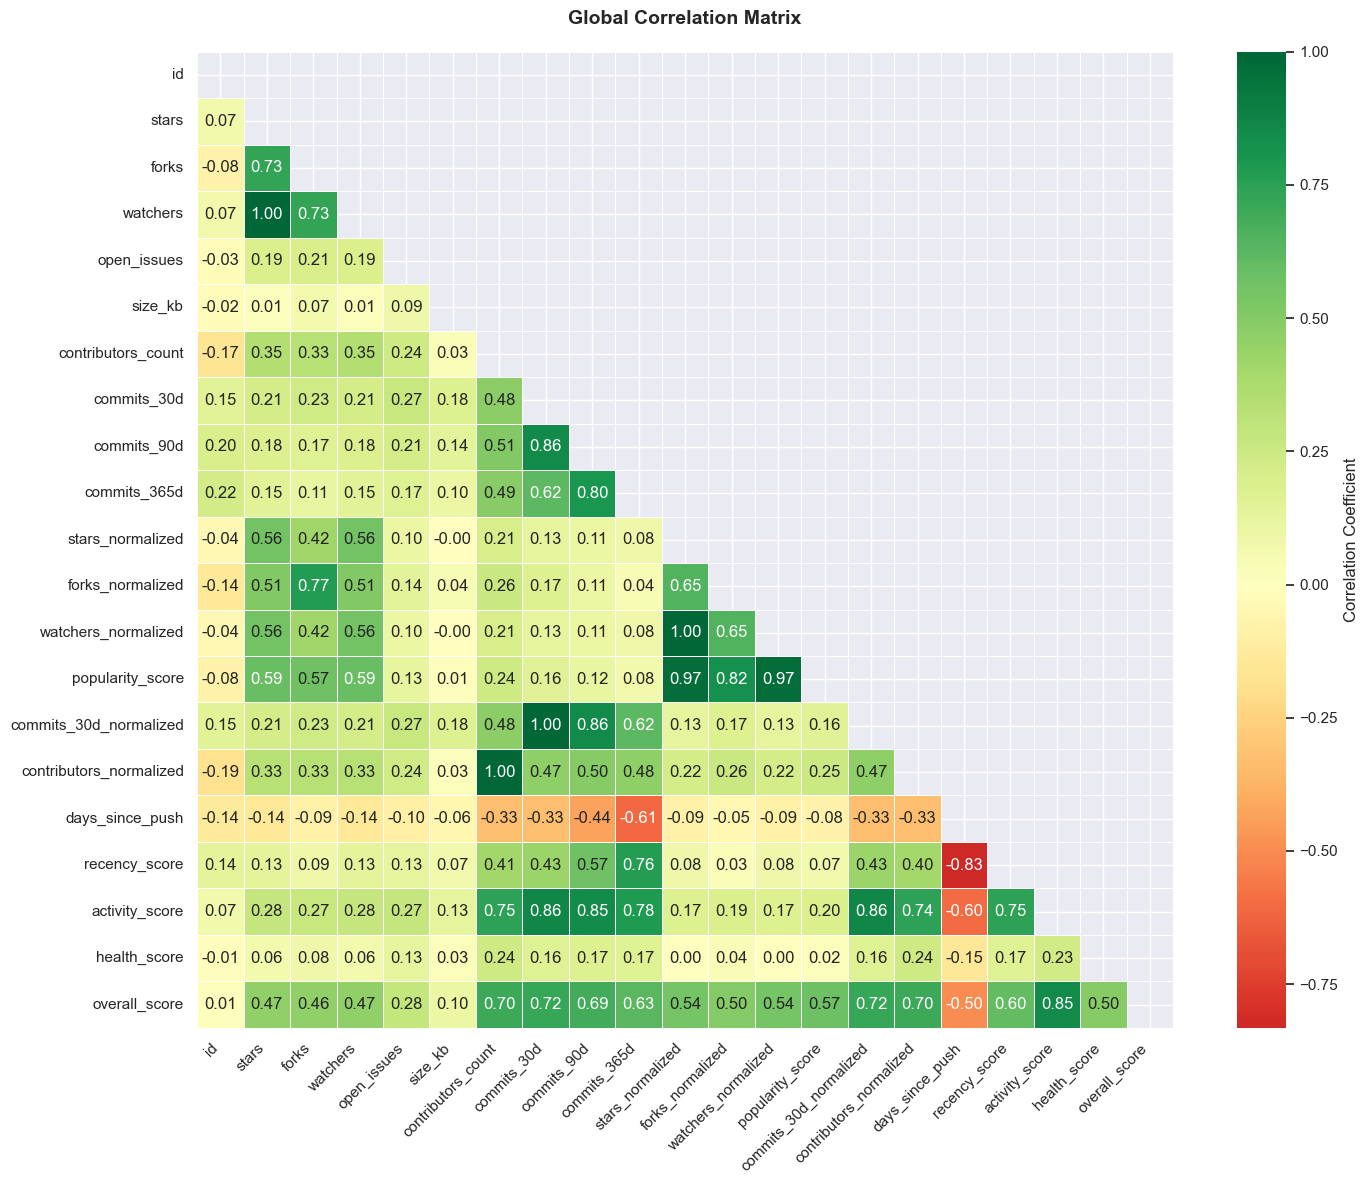


💪 Strongest Positive Correlations:
   • stars vs watchers: 1.000
   • stars_normalized vs watchers_normalized: 1.000
   • commits_30d vs commits_30d_normalized: 1.000
   • contributors_count vs contributors_normalized: 0.997
   • stars_normalized vs popularity_score: 0.968

⚠️ Strongest Negative Correlations:
   • commits_90d vs days_since_push: -0.436
   • days_since_push vs overall_score: -0.500
   • days_since_push vs activity_score: -0.603
   • commits_365d vs days_since_push: -0.606
   • days_since_push vs recency_score: -0.832

📊 Correlation Statistics:
   • Average absolute correlation: 0.363
   • Median absolute correlation: 0.339
   • Strong correlations (|r| > 0.5): 52


In [5]:
# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(corr_matrix))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Global Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find strongest correlations
print("\n💪 Strongest Positive Correlations:")
# Get lower triangle excluding diagonal
mask = np.tril(np.ones_like(corr_matrix), k=-1).astype(bool)
lower_tri = corr_matrix.where(mask)
positive_corrs = lower_tri.unstack().sort_values(ascending=False).dropna()

for idx, corr in positive_corrs.head().items():
    print(f"   • {idx[0]} vs {idx[1]}: {corr:.3f}")

print("\n⚠️ Strongest Negative Correlations:")
for idx, corr in positive_corrs.tail().items():
    print(f"   • {idx[0]} vs {idx[1]}: {corr:.3f}")

print("\n📊 Correlation Statistics:")
print(f"   • Average absolute correlation: {np.abs(lower_tri).mean().mean():.3f}")
print(f"   • Median absolute correlation: {np.abs(lower_tri).median().median():.3f}")
strong_correlations = (np.abs(lower_tri) > 0.5).sum().sum()
print(f"   • Strong correlations (|r| > 0.5): {strong_correlations}")

---
<a id='metrics'></a>
## 3️⃣ Metric Correlations

Analyze relationships between key performance metrics (stars, forks, issues) across languages.

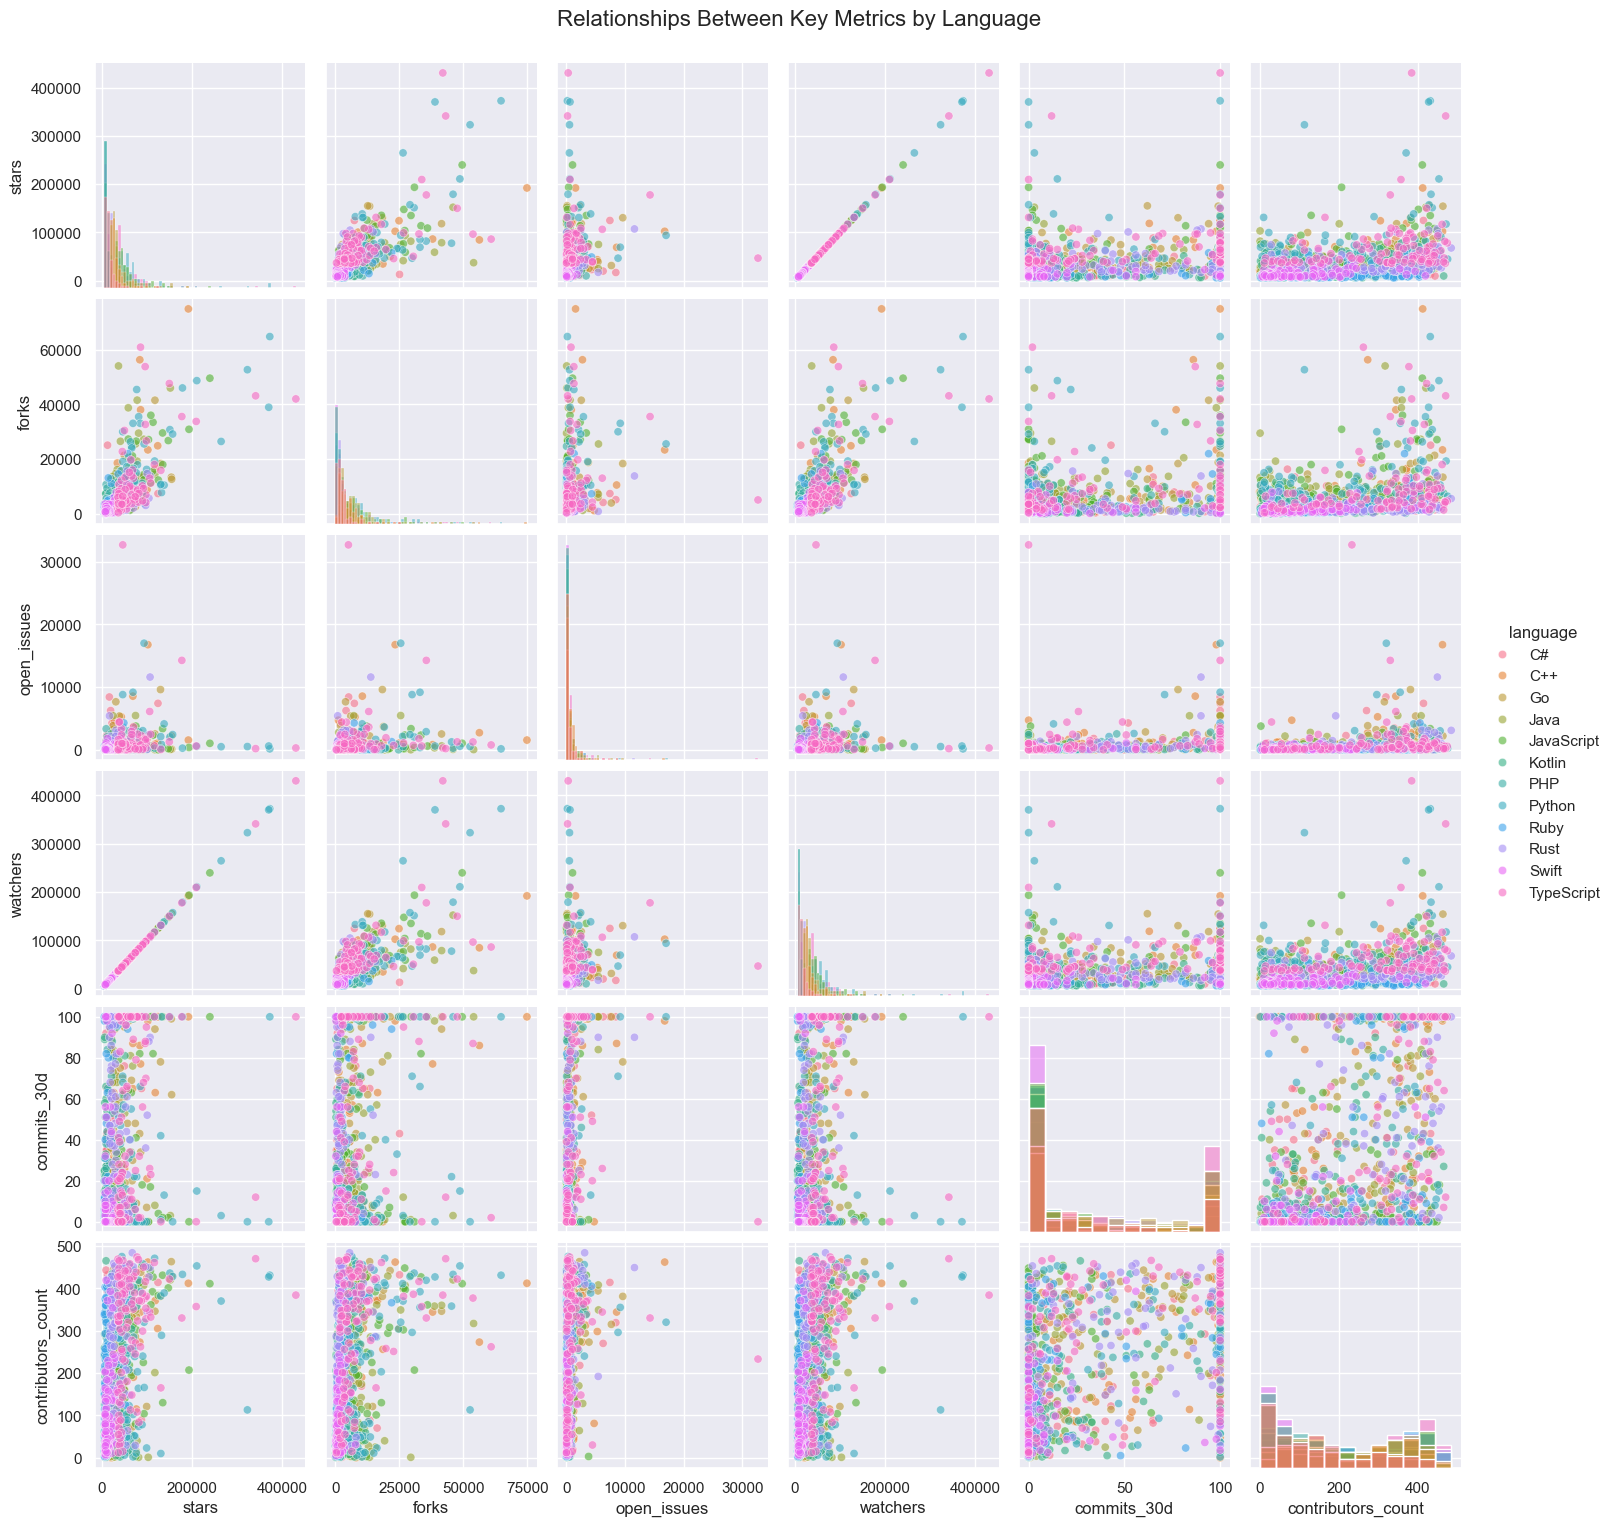


Correlation Matrix for Key Metrics:
                    stars  forks  open_issues  watchers  commits_30d  \
stars               1.000  0.733        0.194     1.000        0.213   
forks               0.733  1.000        0.206     0.733        0.235   
open_issues         0.194  0.206        1.000     0.194        0.265   
watchers            1.000  0.733        0.194     1.000        0.213   
commits_30d         0.213  0.235        0.265     0.213        1.000   
contributors_count  0.348  0.334        0.243     0.348        0.483   

                    contributors_count  
stars                            0.348  
forks                            0.334  
open_issues                      0.243  
watchers                         0.348  
commits_30d                      0.483  
contributors_count               1.000  


In [9]:
# Analyze correlations between key metrics
key_metrics = ['stars', 'forks', 'open_issues', 'watchers', 'commits_30d', 'contributors_count']
key_corr = df[key_metrics].corr()

# Convert language to category for proper plotting
plot_df = df[key_metrics + ['language']].copy()
plot_df['language'] = plot_df['language'].astype('category')

# Create pairplot for visual relationships
g = sns.pairplot(plot_df, hue='language', 
                 plot_kws={'alpha': 0.6}, diag_kind='hist')
g.fig.suptitle('Relationships Between Key Metrics by Language', y=1.02, fontsize=16)
plt.show()

# Print correlation matrix
print("\nCorrelation Matrix for Key Metrics:")
print(key_corr.round(3))

### Key Findings from Metric Correlations

1. Perfect Correlation (r = 1.000):
   - Stars and Watchers show a perfect correlation, indicating they effectively measure the same thing (repository popularity)

2. Strong Correlations (r > 0.7):
   - Stars/Watchers with Forks (r = 0.733): Indicates popular repositories tend to get forked more often
   
3. Moderate Correlations (0.3 < r < 0.7):
   - Commits_30d with Contributors_count (r = 0.483): Shows active repositories tend to have more contributors
   - Stars/Watchers with Contributors_count (r = 0.348): Popular repositories attract more contributors
   
4. Weak Correlations (r < 0.3):
   - Open_issues shows relatively weak correlations with all other metrics (r < 0.3)
   - This suggests that the number of open issues is somewhat independent of repository popularity or activity

5. Notable Language-specific Patterns (from pairplot):
   - Some languages show distinct clustering patterns in the relationship between stars and forks
   - The distribution of commits_30d varies significantly across languages
   - There are several outliers with extremely high metric values across different languages


Correlation between stars and contributors_count by language:
      Language  Correlation
8         Ruby        0.427
6          PHP        0.411
10       Swift        0.395
1          C++        0.362
2           Go        0.315
9         Rust        0.288
7       Python        0.270
4   JavaScript        0.261
0           C#        0.223
11  TypeScript        0.202
3         Java        0.192
5       Kotlin        0.007


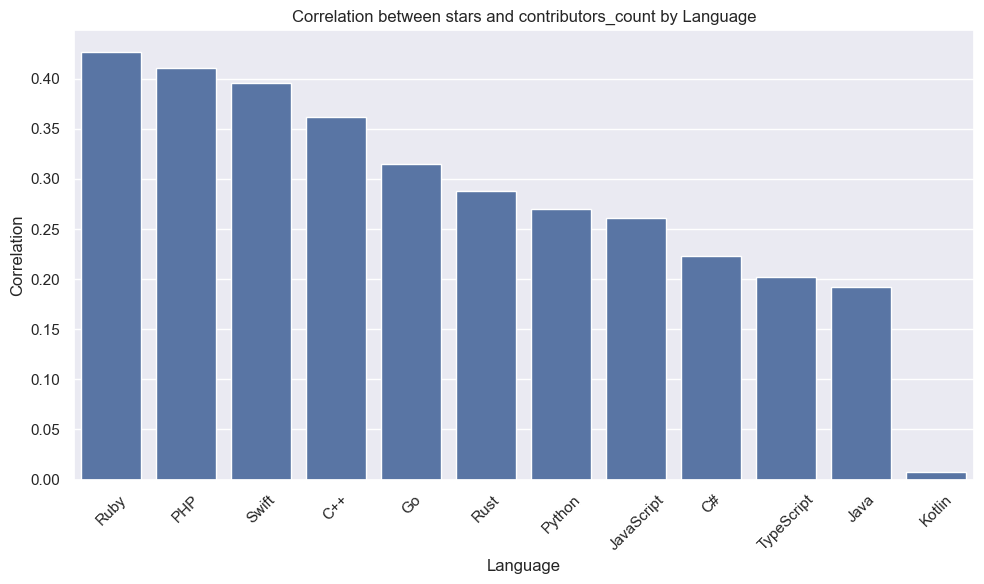

In [10]:
# Analyze correlations by language
language_correlations = {}
for lang in df['language'].unique():
    lang_df = df[df['language'] == lang][key_metrics]
    lang_corr = lang_df.corr()
    language_correlations[lang] = lang_corr

# Find interesting differences in correlations across languages
metrics_of_interest = ['stars', 'contributors_count']  # Example pair
correlations_by_language = pd.DataFrame(
    [(lang, language_correlations[lang].loc[metrics_of_interest[0], metrics_of_interest[1]]) 
     for lang in language_correlations.keys()],
    columns=['Language', 'Correlation']
).sort_values('Correlation', ascending=False)

print(f"\nCorrelation between {metrics_of_interest[0]} and {metrics_of_interest[1]} by language:")
print(correlations_by_language.round(3))

# Visualize the correlation differences
plt.figure(figsize=(10, 6))
sns.barplot(data=correlations_by_language, x='Language', y='Correlation')
plt.title(f'Correlation between {metrics_of_interest[0]} and {metrics_of_interest[1]} by Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Language-Specific Correlation Analysis

The relationship between stars (popularity) and contributors_count (community engagement) varies significantly across languages:

1. Strong Positive Correlations (r > 0.4):
   - Ruby (r = 0.427): Shows the strongest relationship between popularity and contributor count
   - PHP (r = 0.411): Similar to Ruby, suggests mature ecosystem with engaged communities

2. Moderate Correlations (0.3 < r < 0.4):
   - Swift (r = 0.395): Strong community participation in popular repositories
   - C++ (r = 0.362): Established relationship between popularity and contributors
   - Go (r = 0.315): Moderate alignment between stars and contributor count

3. Weak to Moderate Correlations (0.2 < r < 0.3):
   - Rust, Python, JavaScript: Show weaker relationships between popularity and contributors
   - This might indicate more independent development or smaller contributor teams

4. Weak Correlations (r < 0.2):
   - Java (r = 0.192): Surprisingly weak relationship given its maturity
   - Kotlin (r = 0.007): Almost no correlation between stars and contributors
   
These variations might reflect differences in:
- Community collaboration patterns
- Project maintainership models
- Repository usage patterns (libraries vs applications)
- Language ecosystem maturity

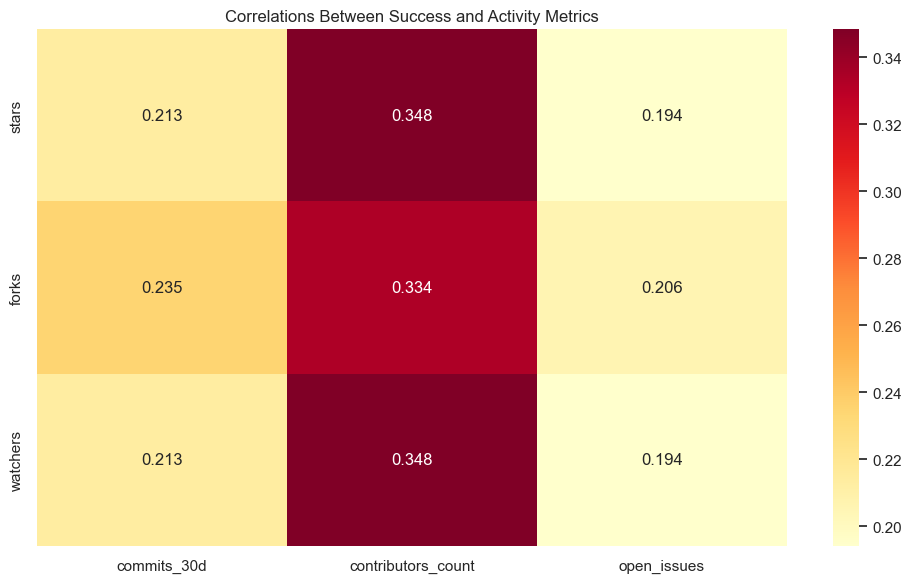


Success-Activity Correlations:
          commits_30d  contributors_count  open_issues
stars           0.213               0.348        0.194
forks           0.235               0.334        0.206
watchers        0.213               0.348        0.194


In [13]:
# Identify success factors through correlation analysis
success_metrics = ['stars', 'forks', 'watchers']
activity_metrics = ['commits_30d', 'contributors_count', 'open_issues']

# Calculate mean correlations between success and activity metrics
success_activity_corr = pd.DataFrame(index=success_metrics, columns=activity_metrics)
for success in success_metrics:
    for activity in activity_metrics:
        success_activity_corr.loc[success, activity] = df[success].astype(float).corr(df[activity].astype(float))

# Convert correlation matrix to numeric values
success_activity_corr = success_activity_corr.astype(float)

# Plot heatmap of success-activity correlations
plt.figure(figsize=(10, 6))
sns.heatmap(success_activity_corr, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Correlations Between Success and Activity Metrics')
plt.tight_layout()
plt.show()

print("\nSuccess-Activity Correlations:")
print(success_activity_corr.round(3))

### Analysis of Success Factors

The heatmap reveals interesting patterns in how repository success metrics (stars, forks, watchers) correlate with activity metrics (commits, contributors, issues):

1. Contributors Count - Strongest Success Factor:
   - Strongest correlation with all success metrics (r ≈ 0.33-0.35)
   - Suggests that having more contributors is a key indicator of repository success
   - The relationship is consistent across different success measures

2. Recent Commit Activity (commits_30d):
   - Moderate correlation with success metrics (r ≈ 0.21-0.24)
   - Shows that actively maintained repositories tend to be more successful
   - Similar correlation strength across stars, forks, and watchers

3. Open Issues:
   - Weakest correlation with success metrics (r ≈ 0.19-0.21)
   - The relationship is consistently weak across all success measures
   - Suggests open issues count is not a strong predictor of repository success

Key Insights:
- Community involvement (contributors) has the strongest relationship with repository success
- Recent activity (commits) shows moderate importance
- Open issues count appears to be largely independent of repository success
- Success metrics (stars, forks, watchers) show very similar correlation patterns with activity metrics

## Correlation Analysis Summary

Our analysis revealed several key insights about GitHub repository metrics and their relationships:

1. **Perfect Correlations**:
   - Stars and Watchers show perfect correlation (r = 1.0)
   - This suggests they effectively measure the same aspect of repository popularity
   - Could consider using just one of these metrics in future analyses

2. **Success Factors**:
   - Number of contributors shows the strongest relationship with repository success
   - Recent commit activity has a moderate positive impact
   - Open issues count has minimal correlation with success metrics

3. **Language-Specific Patterns**:
   - Ruby and PHP show the strongest relationship between stars and contributors
   - Kotlin shows almost no correlation between stars and contributors
   - Different languages exhibit distinct patterns in metric relationships
   
4. **Metric Independence**:
   - Open issues count is relatively independent of other metrics
   - Activity metrics (commits, contributors) show distinct patterns from popularity metrics
   - This suggests these metrics capture different aspects of repository health

5. **Implications for Repository Success**:
   - Building an active contributor community appears crucial for success
   - Maintaining regular commit activity helps, but is not as critical
   - Number of open issues doesn't significantly impact repository popularity

These insights can help in:
- Understanding what drives repository success
- Identifying areas to focus on when managing repositories
- Recognizing the unique characteristics of different programming language communities
- Making data-driven decisions about repository maintenance and community building